# Simple linear regresion example using numpy  


### Model definition  
In this example, a simple linear regression model with two features $x_1$ and $x_2$ will be used.
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \epsilon
$$  
where $a_0$, $a_1$, $a_2$ are parameters of the model, $x_1$, $x_2$ are treated as features, $y$ is treated as a single label and $\epsilon$ is the error term. We will search for the parameters $a_0$, $a_1$, $a_2$, based on the available data. We will use the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) optimization algorithm to find the values of the parameters.  
This example is inspired by material from the book "*Deep Learning with PyTorch Step-by-Step*" by Daniel Voigt Godoy.

### Imports and helper functions definitions.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


def my_fun(x1, x2, a0, a1, a2, eps):
    return a0 + a1 * x1 + a2 * x2 + eps


def shuffle_idx(index_len, ratio):
    idx = np.arange(index_len)
    np.random.shuffle(idx)
    return (idx[: int(index_len * ratio)]), (idx[int(index_len * ratio) :])


def data_vis(data, train, val):
    fig = plt.figure(figsize=(16, 10))
    ax = fig.add_subplot(projection="3d")
    if not (data == None):
        ax.scatter3D(data[0], data[1], data[2], label="Data", alpha=0.3, s=80)
    ax.scatter3D(train[0], train[1], train[2], marker="^", alpha=1, label="Train set")
    ax.scatter3D(val[0], val[1], val[2], marker="^", alpha=1, label="Validation set")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$y$")
    ax.legend()
    plt.show()


### True parameters and initialization

In [62]:
true_a0 = 0.5
true_a1 = -1
true_a2 = 2

n = 101
np.random.seed(58)


### Data generation

Generate train and validation sets. In this application, validation set will not be used.

In [63]:
x1 = np.random.uniform(-1, 1, n)
x2 = np.random.uniform(-5, 5, n)
eps = 0.2 * np.random.randn(n)
y = my_fun(x1, x2, true_a0, true_a1, true_a2, eps)
train_idx, val_idx = shuffle_idx(n, 0.8)
x1_train, x2_train, y_train = x1[train_idx], x2[train_idx], y[train_idx]
x1_val, x2_val, y_val = x1[val_idx], x2[val_idx], y[val_idx]


Data visualization on 3D scatter plot.

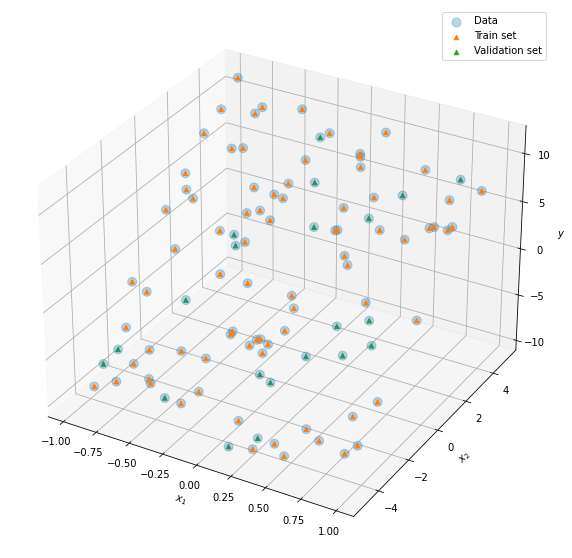

In [64]:
data_vis([x1, x2, y], [x1_train, x2_train, y_train], [x1_val, x2_val, y_val])


## 1. Optimization - feature scaling version

We will use the `StandardScaler` function from the [scikit-learn](https://scikit-learn.org/) package to scale the features.

### 1.1 Features scaling

In [65]:
scaler = StandardScaler(with_mean=True, with_std=True)
x_train = np.vstack((x1_train, x2_train)).T
x_val = np.vstack((x1_val, x2_val)).T
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)


Scaled data visualization

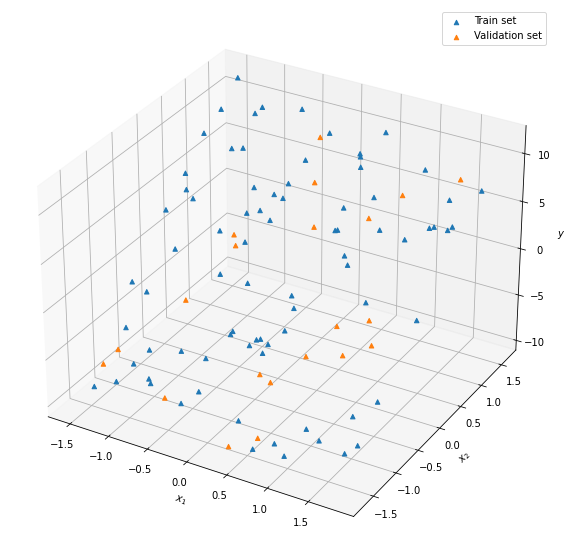

In [66]:
data_vis(None, [x_train[:, 0], x_train[:, 1], y_train], [x_val[:, 0], x_val[:, 1], y_val])


### 1.2 Random initialization of model parameters

In [67]:
a0 = np.random.randn(1)
a1 = np.random.randn(1)
a2 = np.random.randn(1)


### 1.3 Selection of the learning rate and number of epochs

In [68]:
lr = 0.1
n_epochs = 1000


### 1.4 Training/optimization loop

In [69]:
print(f" Parameters before training: {a0} {a1} {a2}")
for epoch in range(n_epochs):
    y_hat = my_fun(x_train[:, 0], x_train[:, 1], a0, a1, a2, 0.0)
    error = y_hat - y_train
    loss = (error**2).mean()
    a0_grad = 2 * error.mean()
    a1_grad = 2 * (x_train[:, 0] * error).mean()
    a2_grad = 2 * (x_train[:, 1] * error).mean()

    a0 = a0 - lr * a0_grad
    a1 = a1 - lr * a1_grad
    a2 = a2 - lr * a2_grad

print(f" Parameters after training: {a0} {a1} {a2}")
print(f" Loss: {loss:3f}")


 Parameters before training: [-0.93982506] [0.84763986] [-1.18202043]
 Parameters after training: [0.82169365] [-0.57623669] [5.94378706]
 Loss: 0.030393


### 1.5 Validation

In [70]:
vx1, vx2 = np.meshgrid(
    np.arange(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 0.01), np.arange(np.min(x_train[:, 1]), np.max(x_train[:, 1]), 0.01)
)
eps = np.zeros(np.shape(n))
vy = my_fun(vx1, vx2, a0, a1, a2, eps)


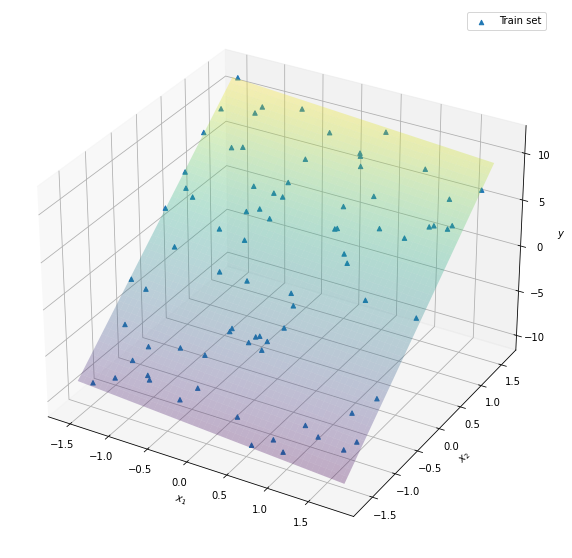

In [71]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(vx1, vx2, vy, alpha=0.3, cmap='viridis')
ax.scatter3D(x_train[:, 0], x_train[:, 1], y_train, marker="^", alpha=1, label="Train set")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")
ax.legend()
plt.show()
